In [78]:
import numpy as np
from matplotlib import pyplot as plt
import healpy as hp
import re
from scipy.interpolate import RegularGridInterpolator as interp2d

In [92]:
phi=np.linspace(0,360,361)
tht=np.linspace(0,90,91)
grid=np.deg2rad(np.meshgrid(phi,tht))
pixnums=hp.ang2pix(128,grid[1], grid[0])

In [16]:
pixnums

array([[    0,     0,     0, ...,     3,     3,     0],
       [   12,    12,    12, ...,    23,    23,    12],
       [   60,    60,    60, ...,    83,    83,    60],
       ...,
       [94464, 94977, 94467, ..., 94973, 95486, 94464],
       [96512, 96001, 96515, ..., 97021, 96510, 96512],
       [97536, 98049, 98050, ..., 98557, 98558, 97536]])

In [14]:
np.meshgrid(phi,tht)

[array([[  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        ...,
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        ...,
        [88., 88., 88., ..., 88., 88., 88.],
        [89., 89., 89., ..., 89., 89., 89.],
        [90., 90., 90., ..., 90., 90., 90.]])]

In [5]:
with open("/home/mohan/Projects/fee-analysis/beam_nec_sims/horgain.txt") as f:
    lines=f.readlines()

In [17]:
horbeam=np.zeros((91,361),dtype='float64')

In [55]:
numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
rx = re.compile(numeric_const_pattern, re.VERBOSE)

In [58]:
xx=''.join(lines)
yy=xx.split('\n\n')[:91]
for lth in yy:
    laz=lth.split('\n')
    for l in laz:
        nums=rx.findall(l)
        nums=[float(m) for m in nums]
        azimuth=int(nums[0])
        za=int(nums[1])
        print(azimuth,za,nums[2])
        gain=10**(nums[2]/10)
        horbeam[np.abs(za),azimuth]=gain

0 -90 -30.0
1 -90 -30.0
2 -90 -30.0
3 -90 -30.0
4 -90 -30.0
5 -90 -30.0
6 -90 -30.0
7 -90 -30.0
8 -90 -30.0
9 -90 -30.0
10 -90 -30.0
11 -90 -30.0
12 -90 -30.0
13 -90 -30.0
14 -90 -30.0
15 -90 -30.0
16 -90 -30.0
17 -90 -30.0
18 -90 -30.0
19 -90 -30.0
20 -90 -30.0
21 -90 -30.0
22 -90 -30.0
23 -90 -30.0
24 -90 -30.0
25 -90 -30.0
26 -90 -30.0
27 -90 -30.0
28 -90 -30.0
29 -90 -30.0
30 -90 -30.0
31 -90 -30.0
32 -90 -30.0
33 -90 -30.0
34 -90 -30.0
35 -90 -30.0
36 -90 -30.0
37 -90 -30.0
38 -90 -30.0
39 -90 -30.0
40 -90 -30.0
41 -90 -30.0
42 -90 -30.0
43 -90 -30.0
44 -90 -30.0
45 -90 -30.0
46 -90 -30.0
47 -90 -30.0
48 -90 -30.0
49 -90 -30.0
50 -90 -30.0
51 -90 -30.0
52 -90 -30.0
53 -90 -30.0
54 -90 -30.0
55 -90 -30.0
56 -90 -30.0
57 -90 -30.0
58 -90 -30.0
59 -90 -30.0
60 -90 -30.0
61 -90 -30.0
62 -90 -30.0
63 -90 -30.0
64 -90 -30.0
65 -90 -30.0
66 -90 -30.0
67 -90 -30.0
68 -90 -30.0
69 -90 -30.0
70 -90 -30.0
71 -90 -30.0
72 -90 -30.0
73 -90 -30.0
74 -90 -30.0
75 -90 -30.0
76 -90 -30.0
77 -90 -3

In [66]:
NSIDE=256
NPIX=hp.nside2npix(NSIDE)
RES=hp.nside2resol(NSIDE,arcmin=True)
print(NPIX,RES)

786432 13.741945647269624


In [72]:
horbeam_hp=np.zeros(NPIX,dtype='float64')
pix_count=horbeam_hp.copy()

In [73]:
for i in range(91):
    for j in range(361):
        pix_count[pixnums[i,j]]+=1
        horbeam_hp[pixnums[i,j]]+=horbeam[i,j]
horbeam_hp/=pix_count

/tmp/ipykernel_2220777/1463854975.py:5: RuntimeWarning: invalid value encountered in divide
  horbeam_hp/=pix_count


In [103]:
mytht,myphi=hp.pix2ang(NSIDE,np.arange(0,NPIX))

In [104]:
idx_above_hor=mytht<=np.pi/2

In [117]:
interpobj=interp2d((np.deg2rad(tht),np.deg2rad(phi)),horbeam,method='cubic')

In [105]:
mytht_above_hor=mytht[idx_above_hor].copy()
myphi_above_hor=myphi[idx_above_hor].copy()

In [112]:
coords=np.zeros((len(mytht_above_hor),2),dtype='float64')
coords[:,0]=mytht_above_hor
coords[:,1]=myphi_above_hor

In [110]:
horbeam_hp=np.zeros(NPIX,dtype='float64')

In [111]:
horbeam_hp[~idx_above_hor]=np.nan
horbeam_hp

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [118]:
horbeam_hp[idx_above_hor]=interpobj(coords)

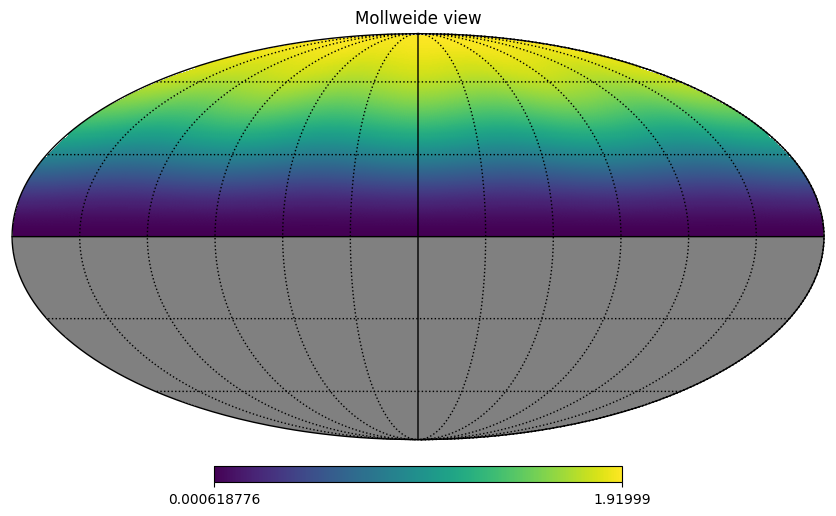

In [119]:
hp.mollview(horbeam_hp)
hp.graticule()

In [128]:
np.nansum(horbeam_hp)*hp.nside2pixarea(NSIDE)/(np.pi*4)

0.43339254782577047

In [129]:
np.nansum(horbeam_hp)*hp.nside2pixarea(NSIDE)

5.446171377480014

In [130]:
2*np.pi

6.283185307179586

In [ ]:
6.28